In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_Width = 50
IMG_height = 50

# paths for dataset
data_path = "Train_Final/leapGestRecog"

# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_Width, IMG_height)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [4]:
# shuffle the input data
import random
random.shuffle(image_data)

input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[3, 4, 4, ..., 2, 4, 3],
        [4, 5, 4, ..., 2, 4, 4],
        [5, 4, 4, ..., 3, 3, 3],
        ...,
        [4, 5, 5, ..., 3, 4, 3],
        [4, 4, 4, ..., 3, 4, 3],
        [5, 4, 5, ..., 4, 3, 3]], dtype=uint8),
 array([[5, 5, 5, ..., 2, 4, 3],
        [4, 4, 6, ..., 3, 4, 4],
        [6, 4, 5, ..., 3, 3, 4],
        ...,
        [5, 6, 6, ..., 4, 3, 4],
        [5, 5, 5, ..., 4, 4, 4],
        [6, 5, 4, ..., 3, 4, 4]], dtype=uint8),
 array([[5, 7, 7, ..., 7, 7, 5],
        [6, 7, 7, ..., 7, 5, 6],
        [6, 7, 7, ..., 7, 8, 7],
        ...,
        [4, 6, 6, ..., 9, 8, 6],
        [5, 6, 6, ..., 9, 9, 7],
        [5, 6, 6, ..., 8, 8, 6]], dtype=uint8),
 array([[7, 6, 6, ..., 6, 7, 4],
        [7, 7, 6, ..., 6, 5, 5],
        [5, 6, 6, ..., 6, 6, 5],
        ...,
        [4, 6, 6, ..., 6, 6, 5],
        [4, 5, 4, ..., 5, 5, 3],
        [5, 5, 6, ..., 5, 6, 6]], dtype=uint8),
 array([[ 4,  5,  5, ...,  5,  4,  5],
        [ 4,  5,  4, ...,  4,  4,  3],
        [ 5,  5,  

In [5]:
label[:10]

[9, 6, 5, 4, 5, 9, 6, 4, 9, 1]

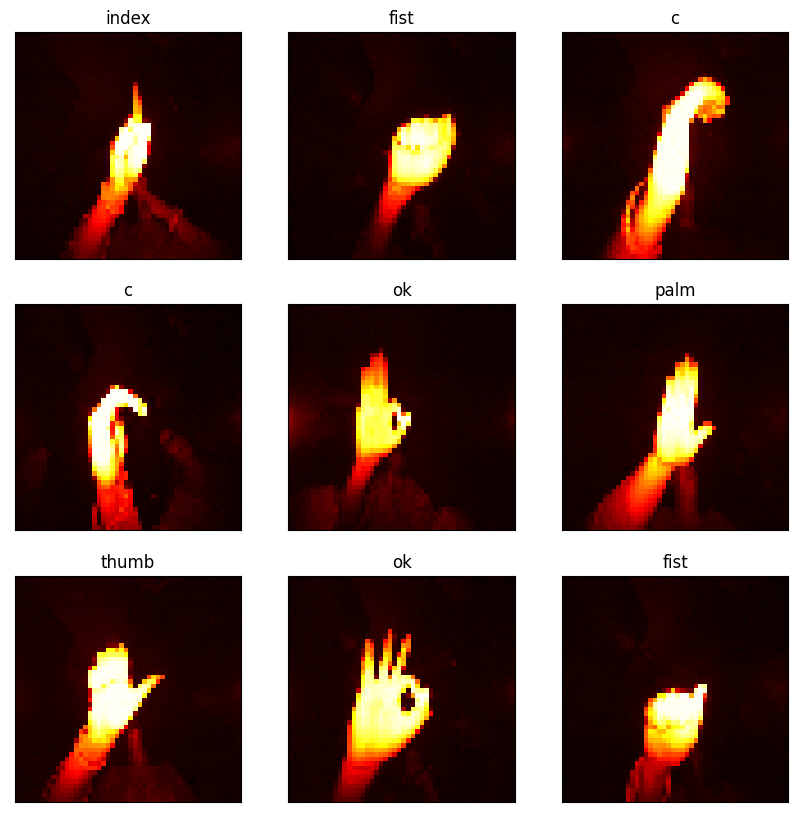

In [5]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [6]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [7]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [8]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

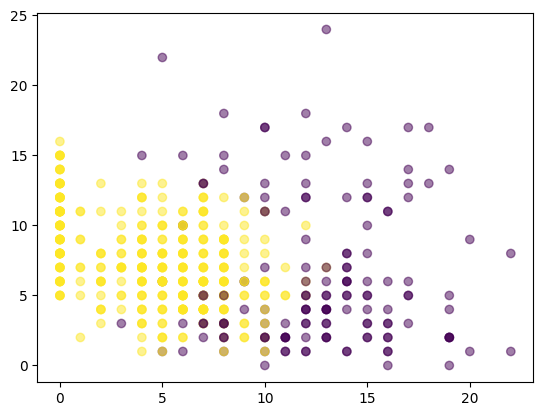

In [9]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

In [10]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [11]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [12]:
# reshaping the data
input_data.shape = (-1, IMG_Width, IMG_height, 1)

In [13]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.20, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16000, 50, 50, 1), (16000, 10), (4000, 50, 50, 1), (4000, 10))

In [16]:
model = keras.models.Sequential()

# model.add(Conv2D(filters = 8, kernel_size = (3,3), input_shape = (IMG_Width, IMG_height, 1)))
# model.add(Activation('relu'))

# model.add(Conv2D(filters = 16, kernel_size = (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.7))

# model.add(Conv2D(filters = 32, kernel_size = (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.7))

# model.add(Conv2D(filters = 64, kernel_size = (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.7))

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
         optimizer = 'adam',
         metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

print("Train accuracy:", history.history['accuracy'][-1])
print("Val accuracy:", history.history['val_accuracy'][-1])

print("Train loss:", history.history['loss'][-1])
print("Val loss:", history.history['val_loss'][-1])

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        832       
                                                                 
 activation_3 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 21, 21, 32)        0         
                                                      

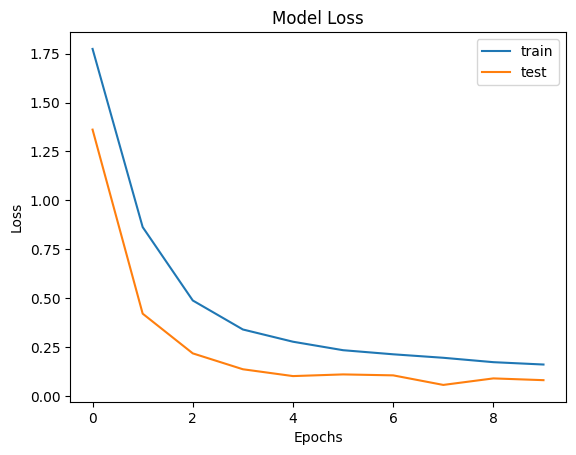

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

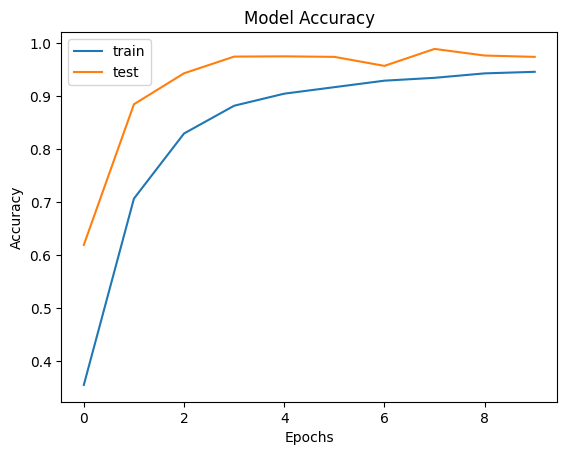

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

63/63 [==============================] - 0s 2ms/step


[]

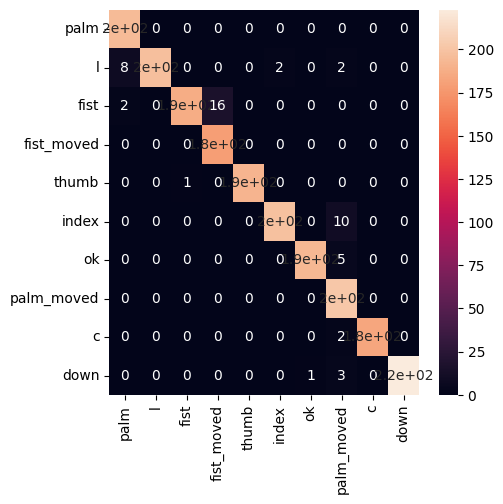

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(5,5))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

AIX (SHAP)

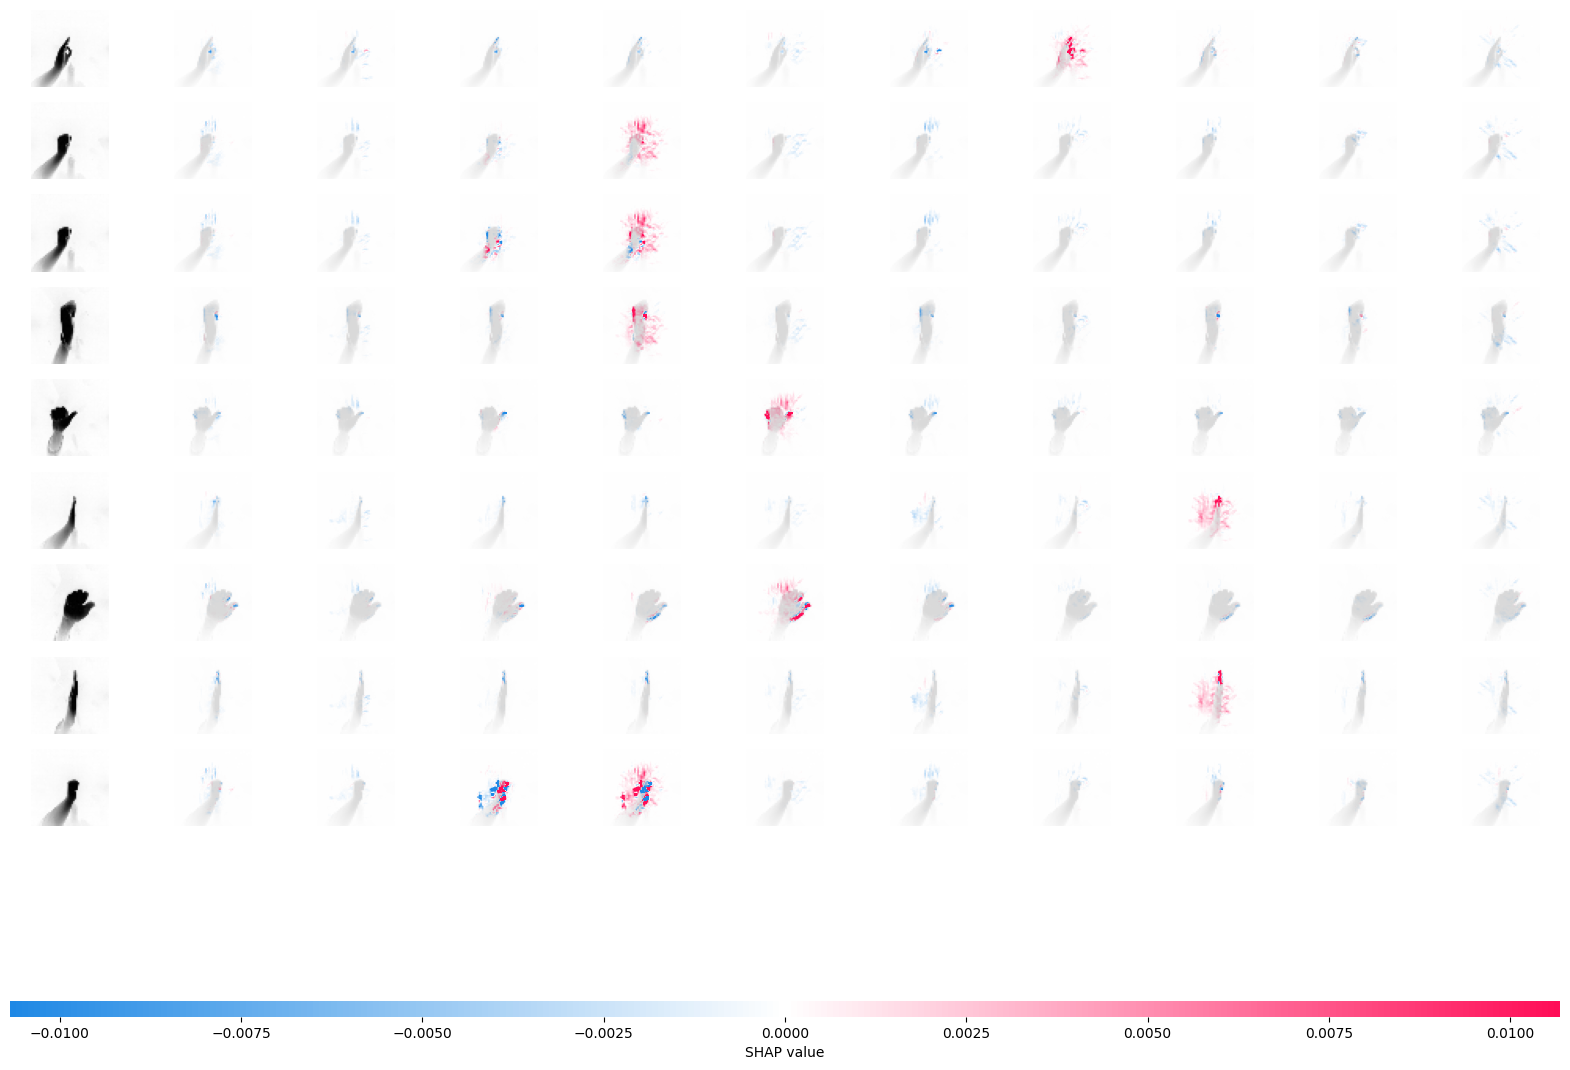

In [ ]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:10])

# plot the feature attributions
shap.image_plot(shap_values, -X_test[1:10])

In [ ]:

# use Kernel SHAP to explain test set predictions
#explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_test[1:5])

# plot the SHAP values for the Setosa output of the first instance
#shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:6], link="logit")
shap.force_plot(explainer.expected_value[0], shap_values[1:5], X_test[1:5], link="logit")

AssertionError: The shap_values arg looks multi output, try shap_values[i].

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = X_train, X_test
to_explain = X[[39,41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

IndexError: index 1 is out of bounds for axis 3 with size 1